In [2]:
library(tidyverse)
library(data.table)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [4]:
gsyih <- read_xls('İl bazında kişi başına gayri safi yurt içi hasıla.xls',) %>% as.data.table
gsyih <- gsyih[-(1:3),c(2,18)]
gsyih <- na.omit(gsyih[-(1:2),])

setnames(gsyih,c('il','gsyih'))

gsyih[,il:=iconv(il,from = 'UTF-8',to = 'ASCII // TRANSLIT')]
setorder(gsyih,il)

gsyih[,id:=sehir_kod]

New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...



In [5]:
ortanca_yas <- read_xls('ortanca_yas.xls') %>% as.data.table
ortanca_yas <- ortanca_yas[-(1:2),c(1,50)]
ortanca_yas <- na.omit(ortanca_yas[-(1:2),])

setnames(ortanca_yas,c('il','ortanca_yas'))
ortanca_yas[,ortanca_yas:=round(as.numeric(ortanca_yas),2)]
ortanca_yas[,il:=iconv(il,from = 'UTF-8',to = 'ASCII // TRANSLIT')]

setorder(ortanca_yas,il)

ortanca_yas[,id:=sehir_kod]

New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...



In [6]:
hane_halki_buyukluk <- read_xls('hane_halki_buyuklugu.xls') %>% as.data.table
hane_halki_buyukluk <- hane_halki_buyukluk[-c(1:3),c(1,13)]
hane_halki_buyukluk <- na.omit(hane_halki_buyukluk)

setnames(hane_halki_buyukluk,c('il','hanehalki'))
hane_halki_buyukluk[,hanehalki:=round(as.numeric(hanehalki),2)]
hane_halki_buyukluk[,il:=iconv(il,from = 'UTF-8',to = 'ASCII // TRANSLIT')]

setorder(hane_halki_buyukluk,il)

hane_halki_buyukluk[,id:=sehir_kod]

New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...



In [7]:
okuma_yazma <- read_xls('egitim_15_yas_ustu.xls') %>%as.data.table
setnames(okuma_yazma,old = 'İllere göre bitirilen eğitim durumu, 2008-2020','y')
okuma_yazma <- okuma_yazma[y=='2019',]

okuma_yazma <- okuma_yazma[-1,c(5,7,11)]
setnames(okuma_yazma,c('il','toplam','bilmeyen'))

okuma_yazma[,toplam:=as.numeric(toplam)]
okuma_yazma[,bilmeyen:=as.numeric(bilmeyen)]
okuma_yazma[,okuma_yazma_bilen_orani:=(1-bilmeyen/toplam)]
okuma_yazma[,il:=iconv(il,from = 'UTF-8',to = 'ASCII // TRANSLIT')]
okuma_yazma[,il:=gsub('[[:blank:]]','',il)]
okuma_yazma[,il:=gsub('Afyon','Afyonkarahisar',il)]
okuma_yazma[,il:=gsub('K.Maras','Kahramanmaras',il)]

setorder(okuma_yazma,il)

okuma_yazma[,id:=sehir_kod]

New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...



In [8]:
suriyeliler <- read_xls('suriyeliler.xls',col_names = c('il','suriyeli_orani')) %>%as.data.table

suriyeliler[,il:=iconv(tolower(il),from = 'UTF-8','ASCII//TRANSLIT')]

firstup <- function(x) {
  substr(x, 1, 1) <- toupper(substr(x, 1, 1))
  x
}

suriyeliler[,il:=firstup(il)]

suriyeliler[,suriyeli_orani:=as.numeric(gsub('%','',gsub(',','.',suriyeli_orani)))]
suriyeliler[,il:=gsub('Afyon','Afyonkarahisar',il)]
suriyeliler[,suriyeli_orani:=suriyeli_orani/100]
setorder(suriyeliler,il)
suriyeliler[,id:=sehir_kod]

# HARİTA

In [9]:
options(repr.plot.width=15)

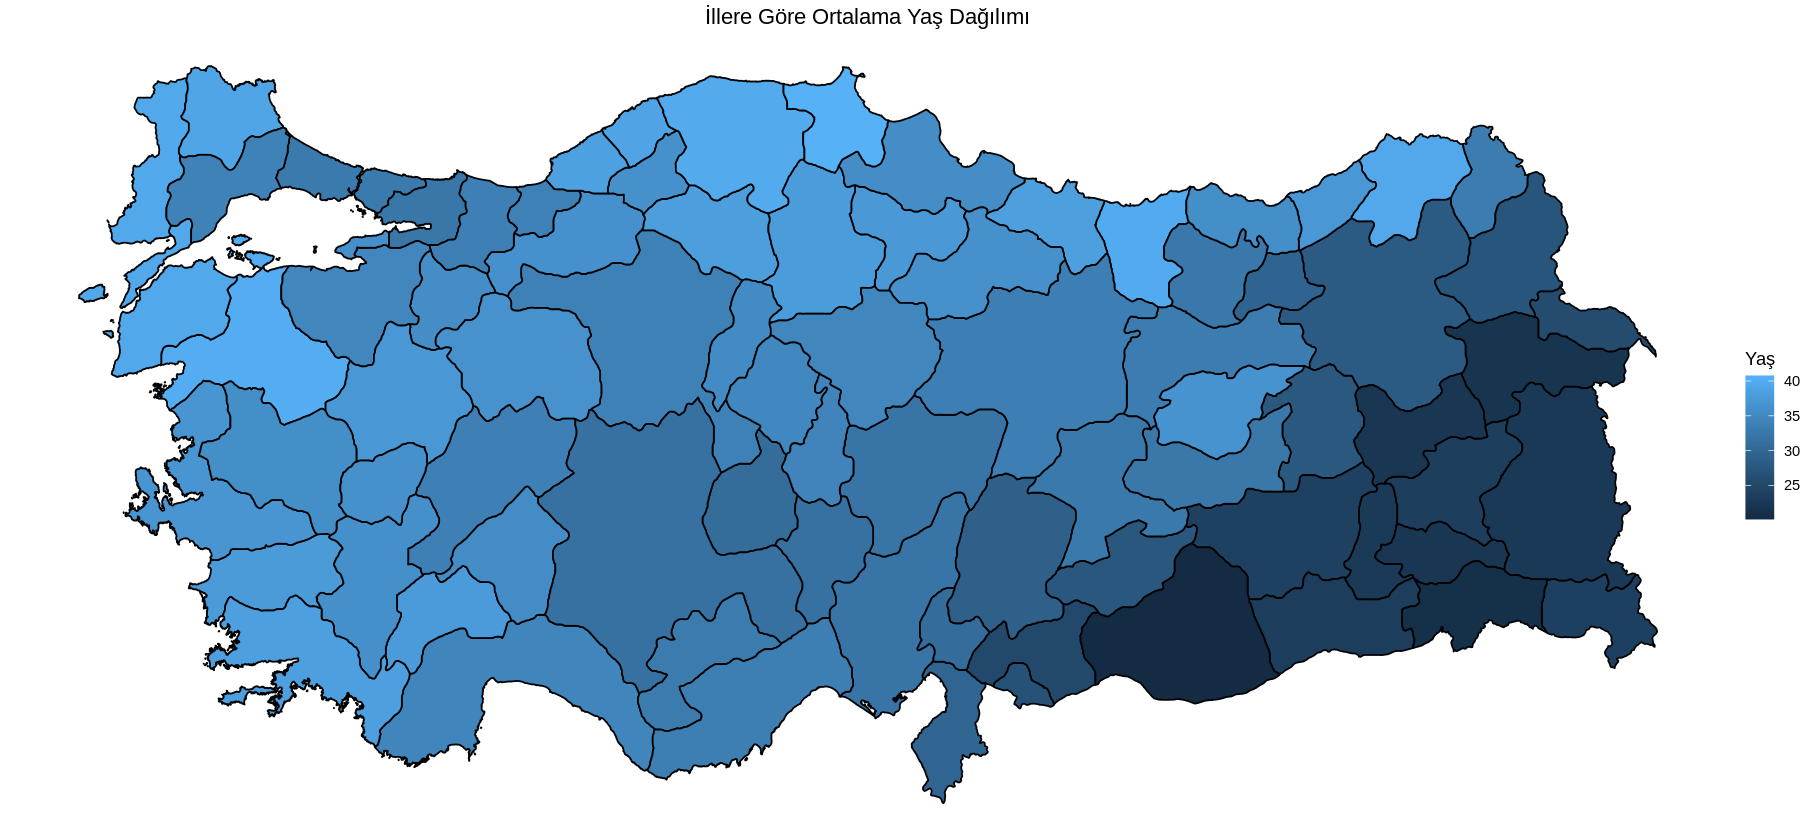

In [10]:
tr_map_gg %>%
left_join(ortanca_yas,by=c('id')) %>%
ggplot(aes(x=long,y=lat,group=group,color=group,fill=ortanca_yas))+
geom_polygon()+
scale_color_manual(values = rep('black',320))+
theme_void()+
theme(plot.title = element_text(hjust=0.5))+
guides(color='none')+
ggtitle('İllere Göre Ortalama Yaş Dağılımı')+
labs(fill = 'Yaş')

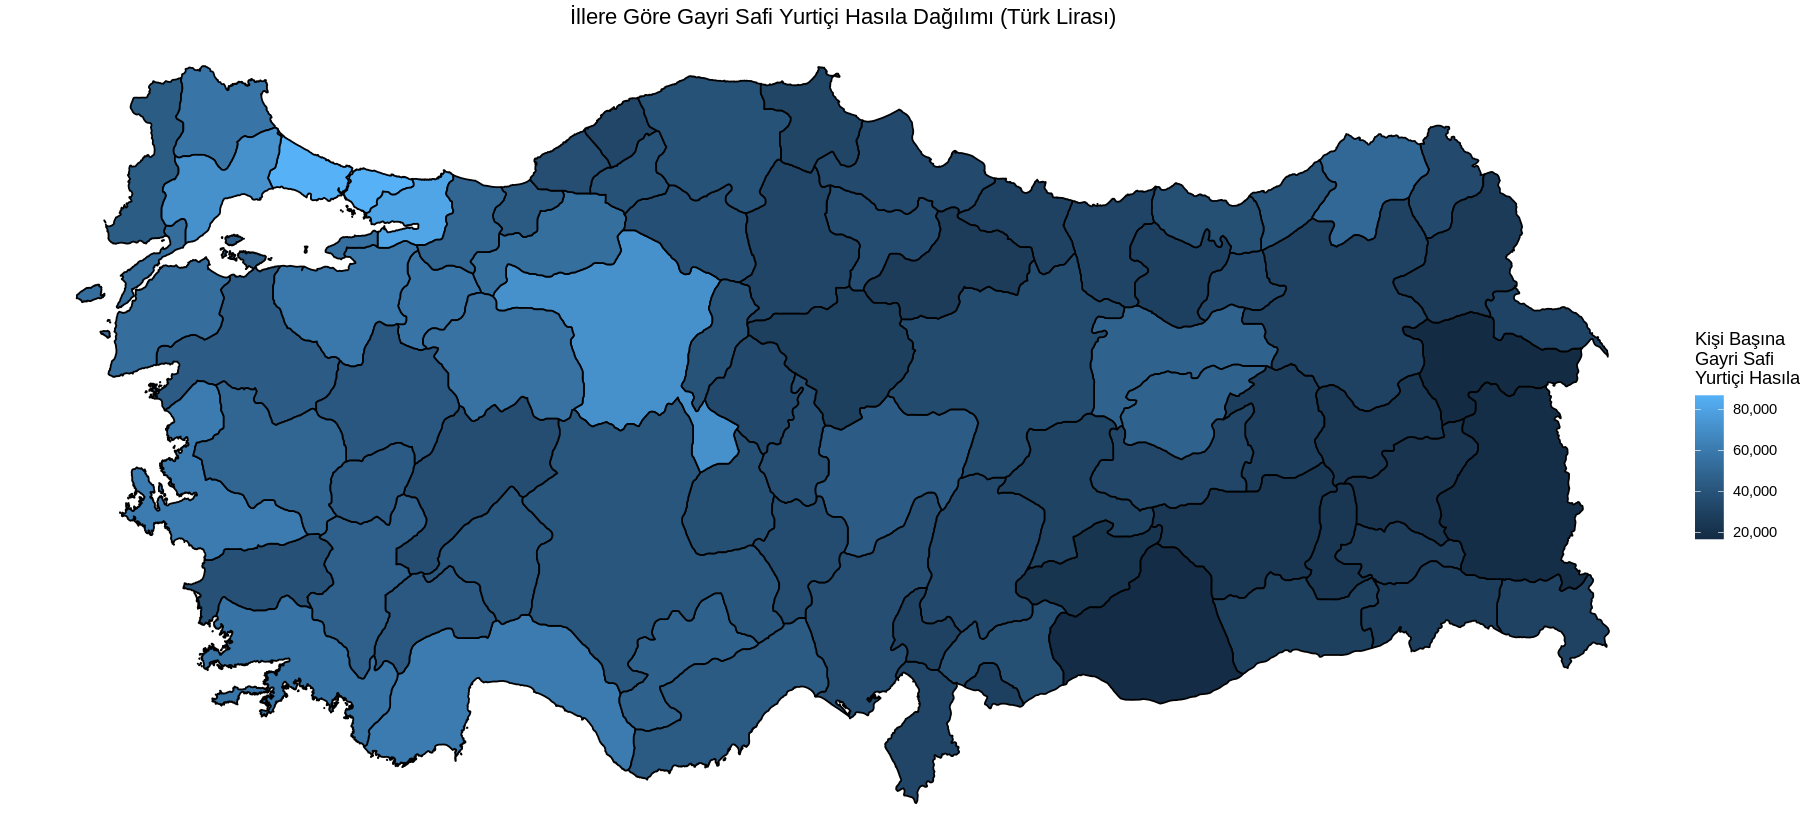

In [11]:
tr_map_gg %>%
left_join(gsyih,by=c('id')) %>%
ggplot(aes(x=long,y=lat,group=group,color=group,fill=gsyih))+
geom_polygon()+
scale_color_manual(values = rep('black',320))+
theme_void()+
theme(plot.title = element_text(hjust=0.5))+
guides(color='none')+
scale_fill_continuous(labels = scales::comma)+
ggtitle('İllere Göre Gayri Safi Yurtiçi Hasıla Dağılımı (Türk Lirası)')+
labs(fill='Kişi Başına\nGayri Safi \nYurtiçi Hasıla')

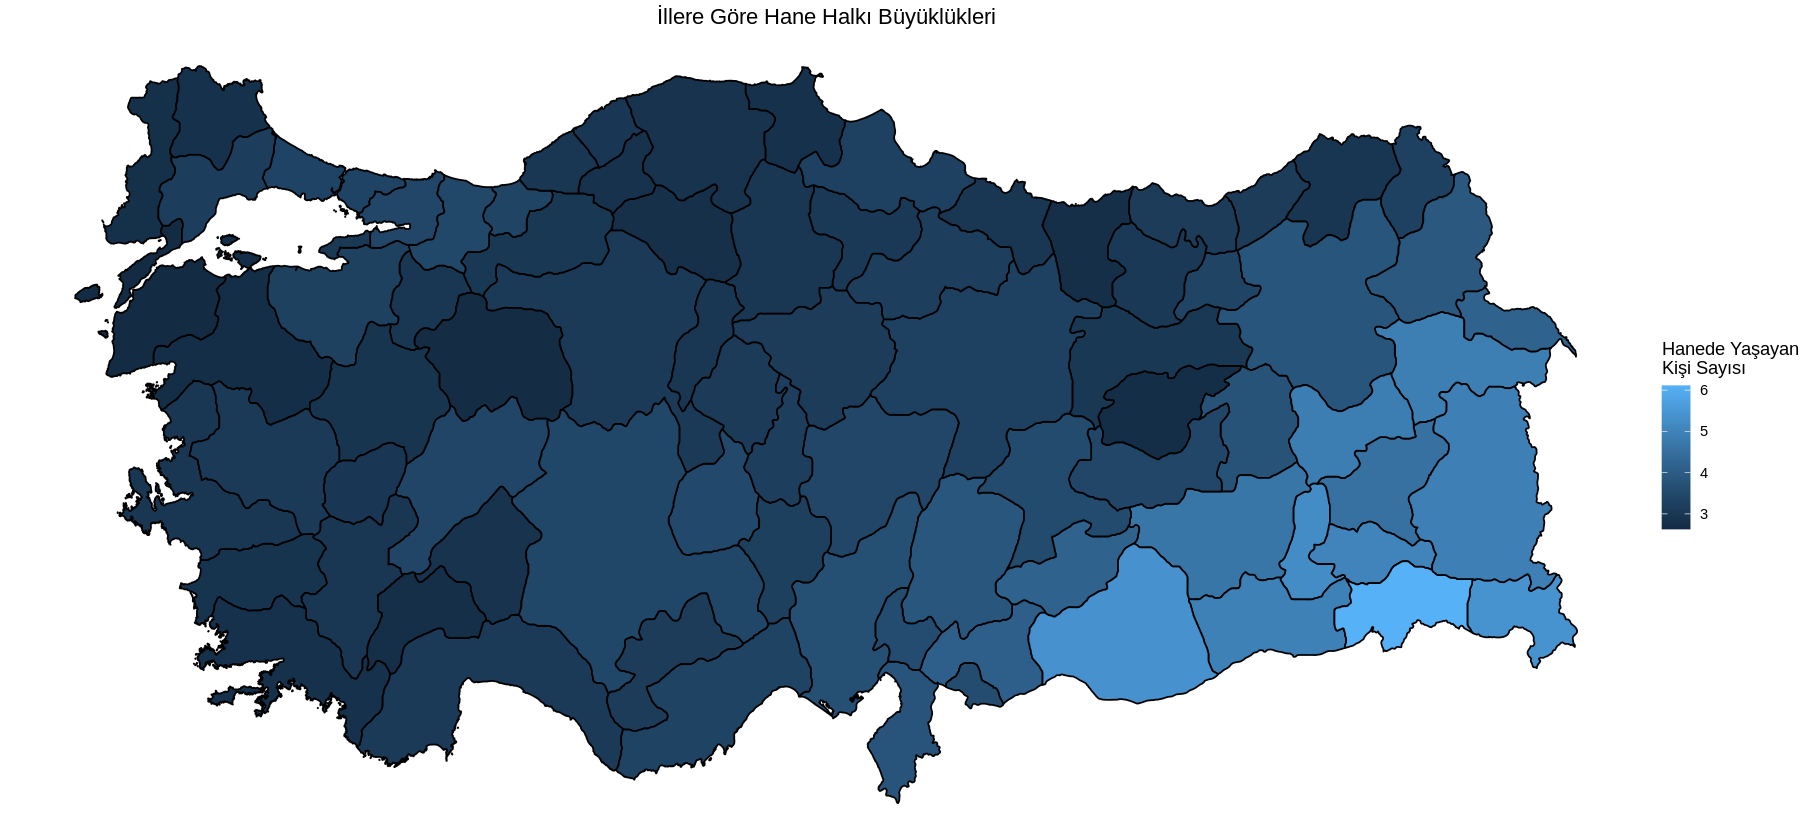

In [12]:
tr_map_gg %>%
left_join(hane_halki_buyukluk,by=c('id')) %>%
ggplot(aes(x=long,y=lat,group=group,color=group,fill=hanehalki))+
geom_polygon()+
scale_color_manual(values = rep('black',320))+
theme_void()+
theme(plot.title = element_text(hjust=0.5))+
guides(color='none')+
ggtitle('İllere Göre Hane Halkı Büyüklükleri')+
labs(fill='Hanede Yaşayan\nKişi Sayısı')

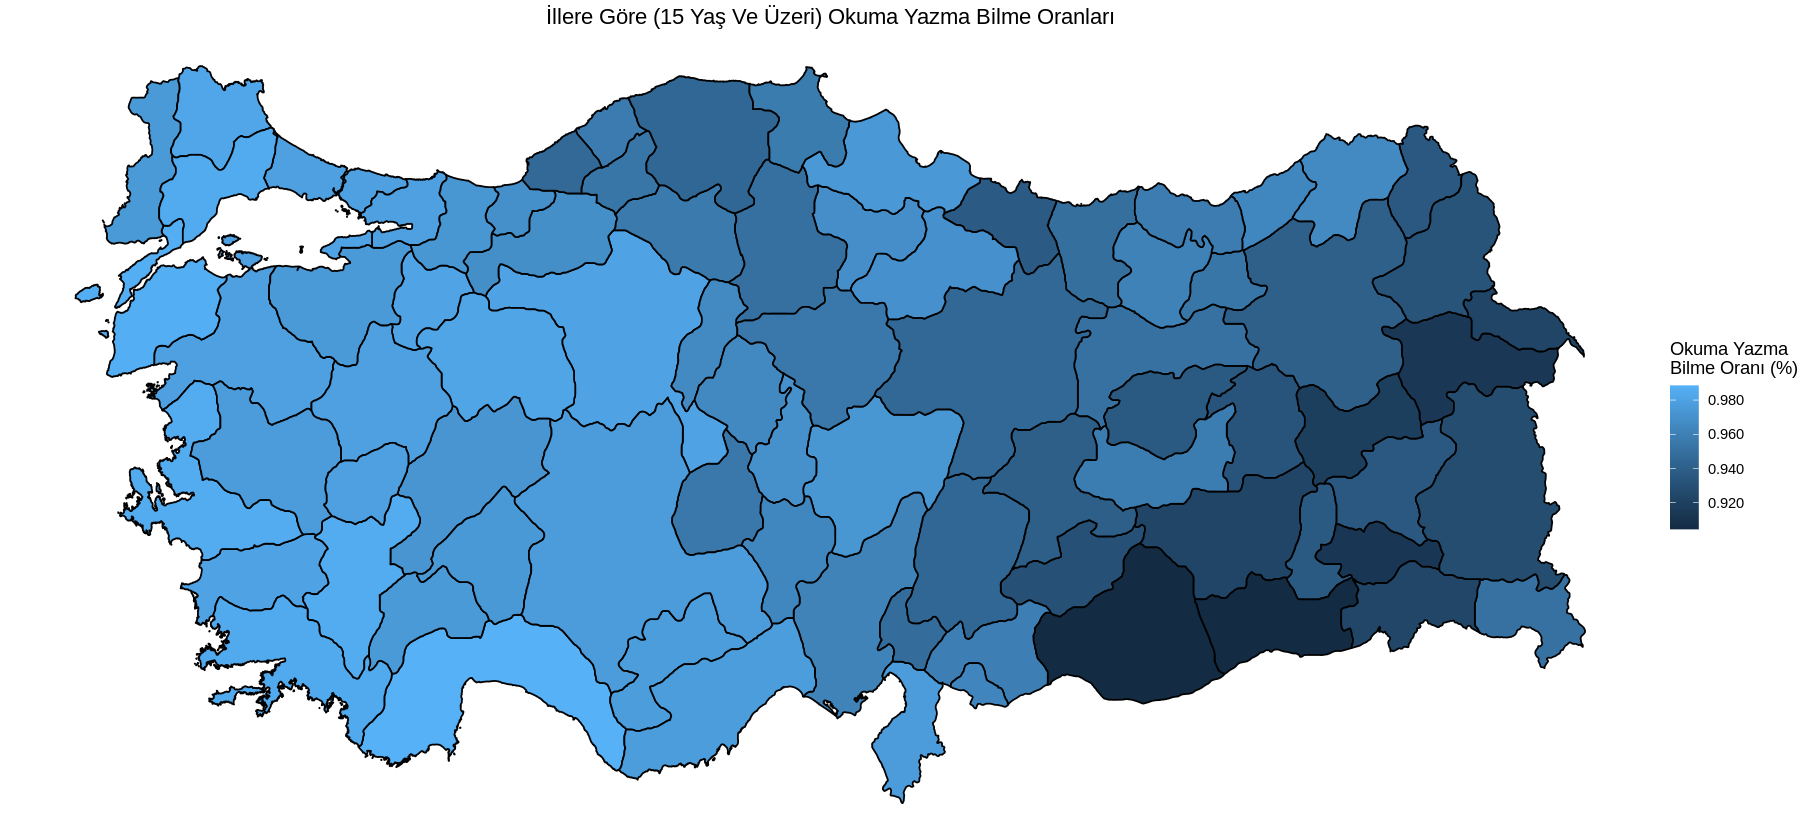

In [13]:
tr_map_gg %>%
left_join(okuma_yazma,by=c('id')) %>%
ggplot(aes(x=long,y=lat,group=group,color=group,fill=okuma_yazma_bilen_orani))+
geom_polygon()+
scale_color_manual(values = rep('black',320))+
theme_void()+
theme(plot.title = element_text(hjust=0.5))+
guides(color='none')+
scale_fill_continuous(labels = scales::comma)+
ggtitle('İllere Göre (15 Yaş Ve Üzeri) Okuma Yazma Bilme Oranları')+
labs(fill='Okuma Yazma\nBilme Oranı (%)')

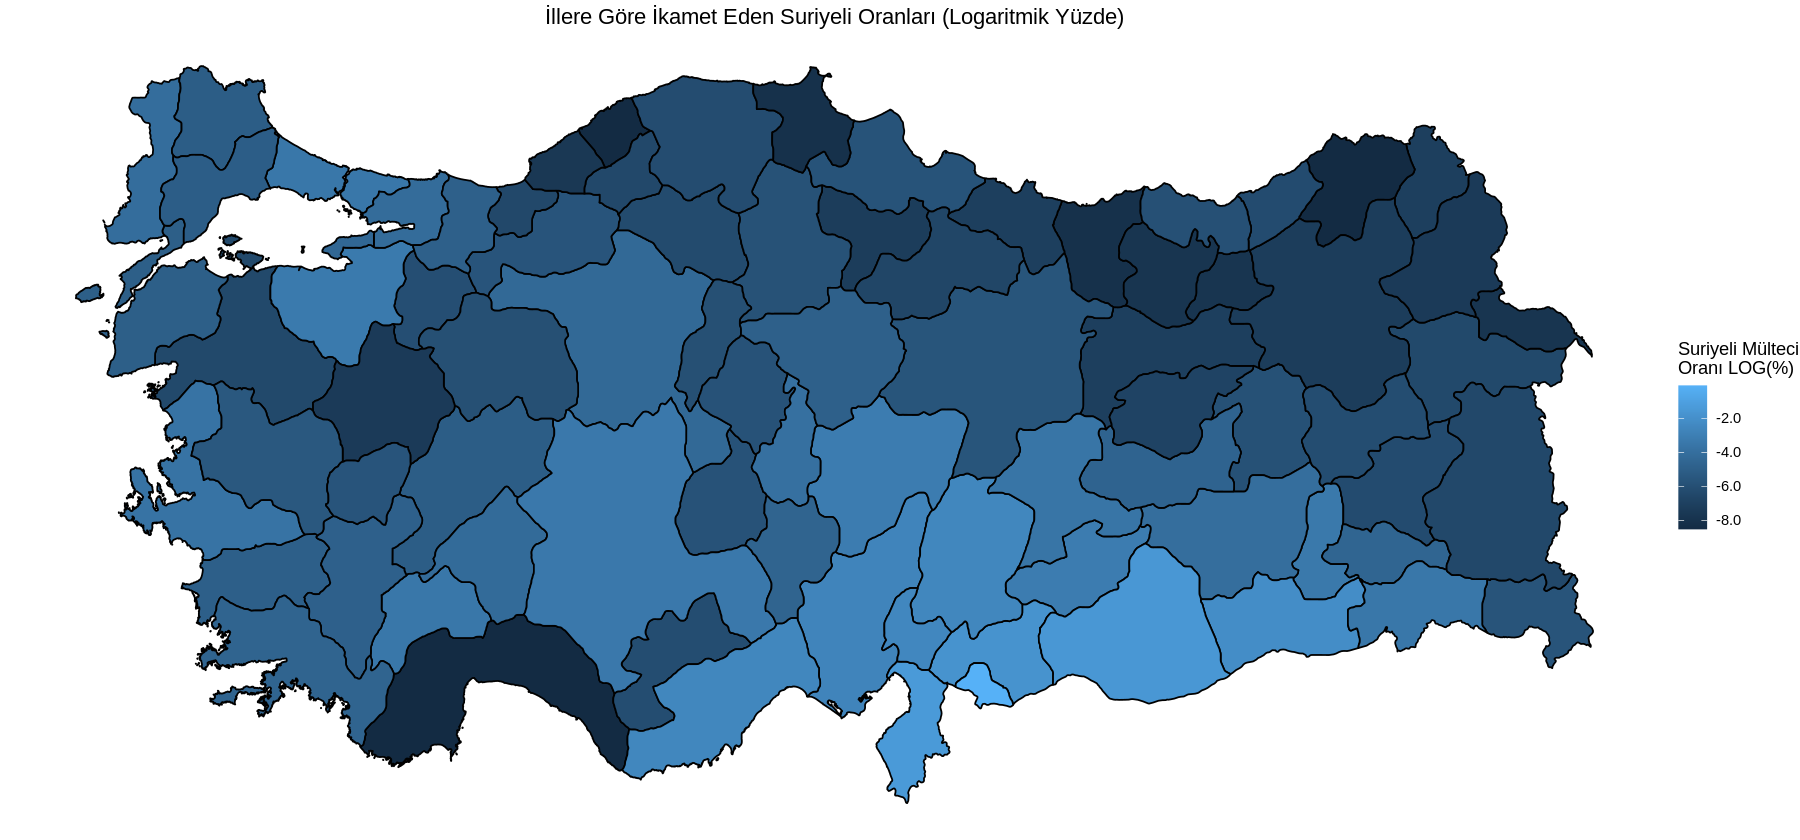

In [21]:
tr_map_gg %>%
left_join(suriyeliler,by=c('id')) %>%
ggplot(aes(x=long,y=lat,group=group,color=group,fill=log(suriyeli_orani)))+
geom_polygon()+
scale_color_manual(values = rep('black',320))+
theme_void()+
theme(plot.title = element_text(hjust=0.5))+
guides(color='none')+
scale_fill_continuous(labels = scales::comma)+
ggtitle('İllere Göre İkamet Eden Suriyeli Oranları (Logaritmik Yüzde)')+
labs(fill='Suriyeli Mülteci\nOranı LOG(%)')

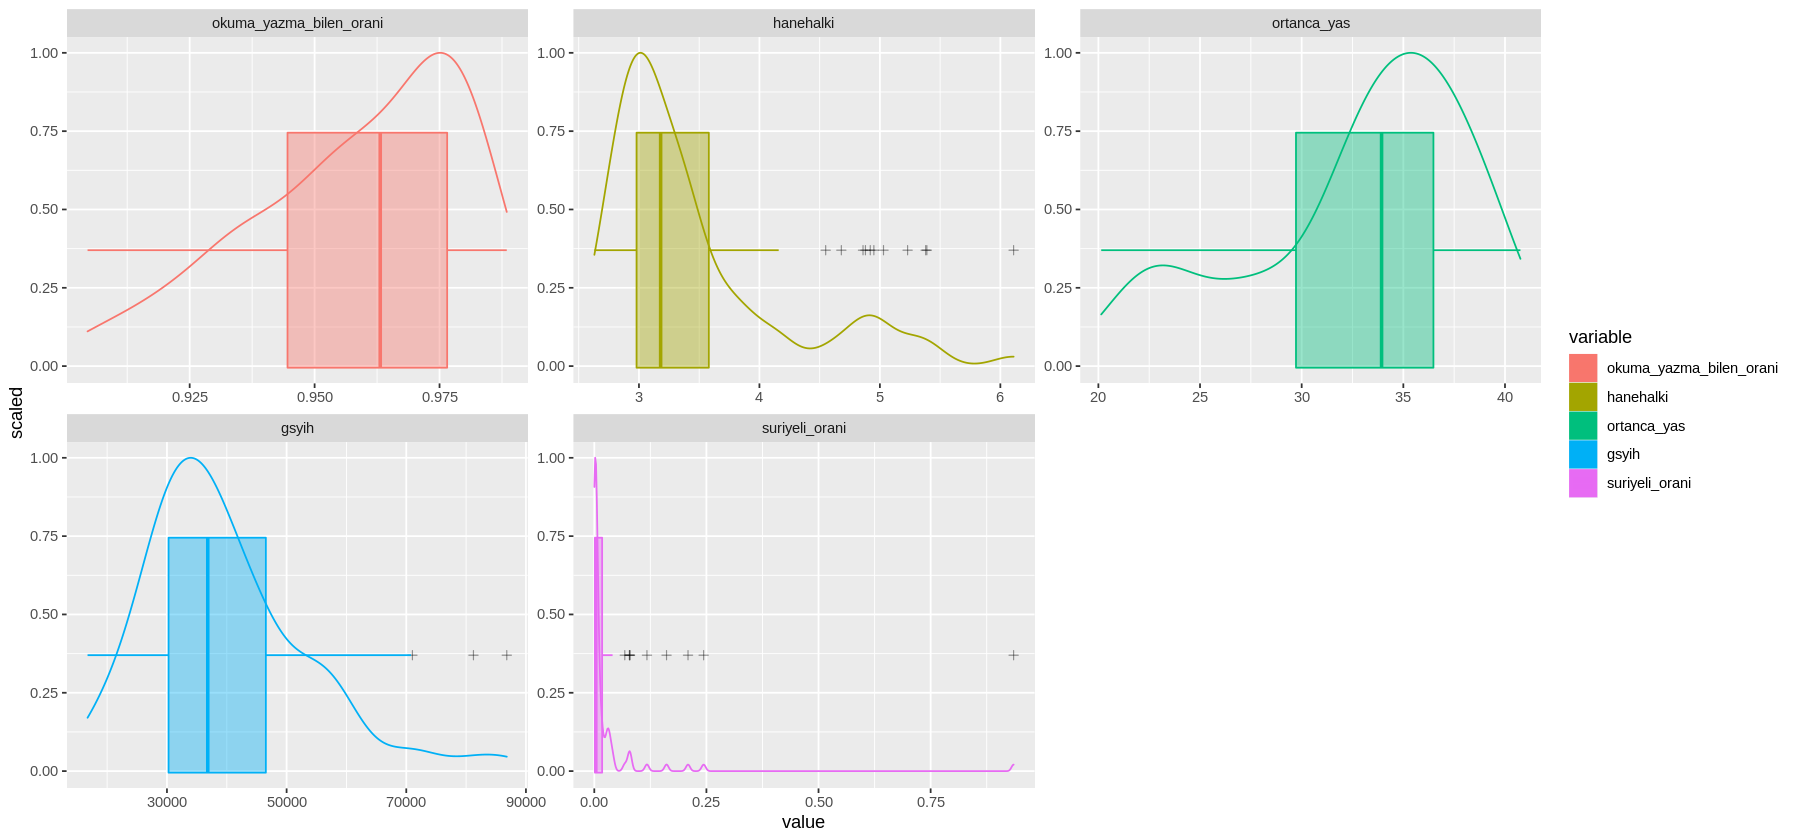

In [15]:
okuma_yazma %>%
select(il,okuma_yazma_bilen_orani) %>%
full_join(hane_halki_buyukluk %>%
          select(-id),by='il') %>%
full_join(ortanca_yas %>%
          select(-id),by='il') %>%
full_join(gsyih %>%
          select(-id),by='il') %>%
full_join(suriyeliler %>%
          select(-id),by='il') -> toplu_veri

toplu_veri%>%
melt(id.vars = 'il') %>%
ggplot(aes(x=value,color=variable))+
geom_density(aes(y=..scaled..))+
geom_boxplot(aes(fill=variable,y=0.37),outlier.shape = 3,outlier.colour = 'black',alpha=0.4)+
facet_wrap(~variable,scales ='free')


In [16]:
formula <- gsyih ~ yas_cut + 1

In [17]:
toplu_veri %>%class

[1] "data.table" "data.frame"